<a href="https://colab.research.google.com/github/wanchenlang-max/econ-lab/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

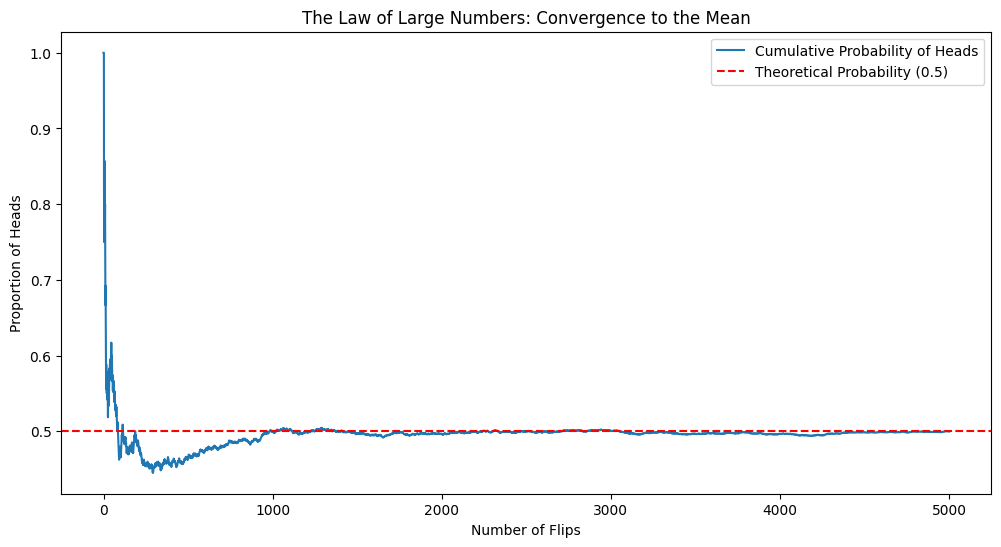

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_law_of_large_numbers(n_flips):

    flips = np.random.randint(0, 2, size=n_flips)

    cumulative_averages = np.cumsum(flips) / np.arange(1, n_flips + 1)

    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_averages, label='Cumulative Probability of Heads')
    plt.axhline(0.5, color='red', linestyle='--', label='Theoretical Probability (0.5)')
    plt.title('The Law of Large Numbers: Convergence to the Mean')
    plt.xlabel('Number of Flips')
    plt.ylabel('Proportion of Heads')
    plt.legend()
    plt.show()

simulate_law_of_large_numbers(5000)

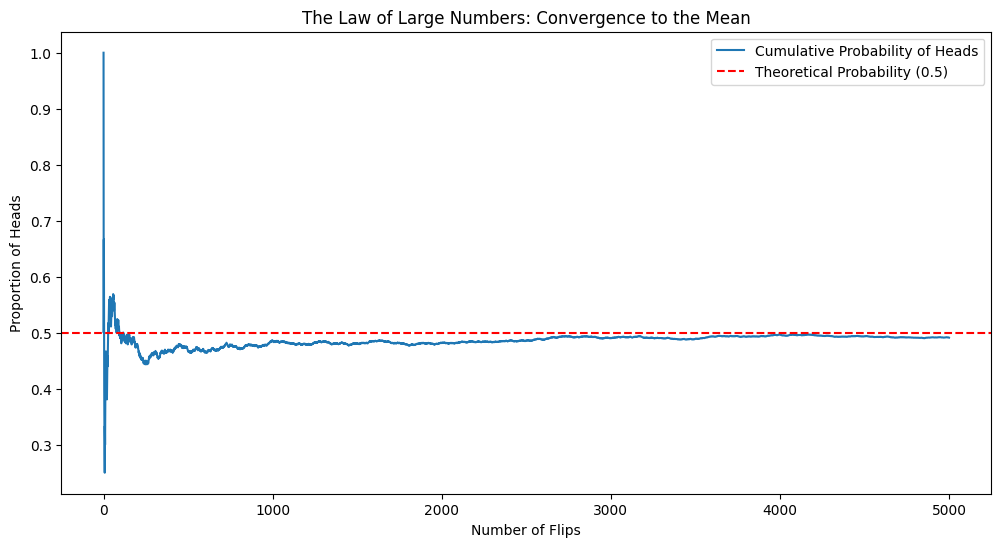

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_law_of_large_numbers(n_flips):
    # Simulate n_flips of a fair coin (0 or 1)
    flips = np.random.randint(0, 2, size=n_flips)

    # Calculate cumulative average
    # cumsum adds them up sequentially
    # Divide by range(1, n+1) to get average at each step
    cumulative_averages = np.cumsum(flips) / np.arange(1, n_flips + 1)

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_averages, label='Cumulative Probability of Heads')
    plt.axhline(0.5, color='red', linestyle='--', label='Theoretical Probability (0.5)')
    plt.title('The Law of Large Numbers: Convergence to the Mean')
    plt.xlabel('Number of Flips')
    plt.ylabel('Proportion of Heads')
    plt.legend()
    plt.show()

# Run the simulation
simulate_law_of_large_numbers(5000)

In [14]:
def monty_hall_sim(n_games):
    switch_wins = 0
    stay_wins = 0

    for _ in range(n_games):
        doors = [0, 1, 2]
        prize = np.random.choice(doors)
        choice = np.random.choice(doors)

        # Host opens a door
        # Host cannot open 'prize' and cannot open 'choice'
        openable_doors = [d for d in doors if d != prize and d != choice]
        host_opens = np.random.choice(openable_doors)

        # Strategy: Stay
        if choice == prize:
            stay_wins += 1

        # Strategy: Switch
        # The switch choice is the door that is not 'choice' and not 'host_opens'
        switch_choice = [d for d in doors if d != choice and d != host_opens]
        if switch_choice[0] == prize:
            switch_wins += 1

    print(f"Win Rate (Stay): {stay_wins/n_games:.2%}")
    print(f"Win Rate (Switch): {switch_wins/n_games:.2%}")

monty_hall_sim(10000)

Win Rate (Stay): 33.61%
Win Rate (Switch): 66.39%


Probability of Revenue Decline: 17.61%
95% Value at Risk (Worst Case): $9,614,689.21


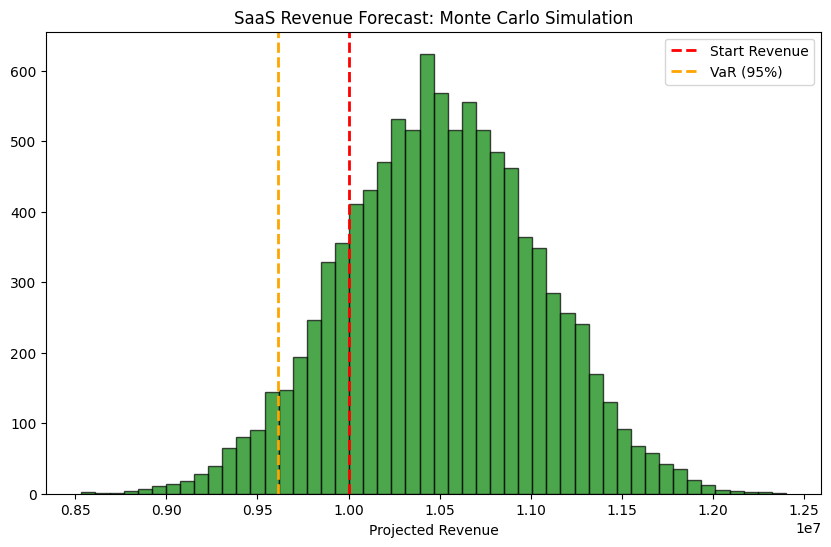

In [15]:
def saas_risk_model(n_sims):
    base_rev = 10_000_000

    # Stochastic Inputs
    # Churn is centered at 10% but can vary (Standard Deviation 2%)
    churn_sims = np.random.normal(0.10, 0.02, n_sims)
    # Sales centered at $1.5M, varies by $500k
    sales_sims = np.random.normal(1_500_000, 500_000, n_sims)

    # The Transfer Function (The Business Logic)
    net_revenue = base_rev * (1 - churn_sims) + sales_sims

    # Risk Metrics
    # Probability that we end the year with LESS money than we started
    prob_loss = np.mean(net_revenue < base_rev)

    # Value at Risk (95% Confidence)
    # We are 95% sure revenue will be ABOVE this number (the 5th percentile)
    var_95 = np.percentile(net_revenue, 5)

    print(f"Probability of Revenue Decline: {prob_loss:.2%}")
    print(f"95% Value at Risk (Worst Case): ${var_95:,.2f}")

    # Visualization
    plt.figure(figsize=(10,6))
    plt.hist(net_revenue, bins=50, alpha=0.7, color='green', edgecolor='black')
    plt.axvline(base_rev, color='red', linestyle='dashed', linewidth=2, label='Start Revenue')
    plt.axvline(var_95, color='orange', linestyle='dashed', linewidth=2, label='VaR (95%)')
    plt.title('SaaS Revenue Forecast: Monte Carlo Simulation')
    plt.xlabel('Projected Revenue')
    plt.legend()
    plt.show()

saas_risk_model(10000)

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Task 1: Monte Carlo Simulation
# -----------------------------

def saas_model_normal(n_sims=10000):
    base_rev = 10_000_000

    churn = np.random.normal(0.10, 0.02, n_sims)
    sales = np.random.normal(1_500_000, 500_000, n_sims)

    net_revenue = base_rev * (1 - churn) + sales
    return net_revenue


def saas_model_fat_tail(n_sims=10000):
    base_rev = 10_000_000

    churn = np.random.normal(0.10, 0.02, n_sims)

    # Student-t with df=3, scaled to sales magnitude
    sales = np.random.standard_t(df=3, size=n_sims) * 500_000 + 1_500_000

    net_revenue = base_rev * (1 - churn) + sales
    return net_revenue

In [18]:
# -----------------------------
# Task 2: VaR Comparison
# -----------------------------

n_sims = 10000

normal_results = saas_model_normal(n_sims)
fat_tail_results = saas_model_fat_tail(n_sims)

var_95_normal = np.percentile(normal_results, 5)
var_95_fat = np.percentile(fat_tail_results, 5)

print("=== 95% Value at Risk (VaR) Comparison ===")
print(f"Normal Distribution VaR: ${var_95_normal:,.2f}")
print(f"Fat-Tail (Student-t) VaR: ${var_95_fat:,.2f}")

=== 95% Value at Risk (VaR) Comparison ===
Normal Distribution VaR: $9,619,582.53
Fat-Tail (Student-t) VaR: $9,311,347.56


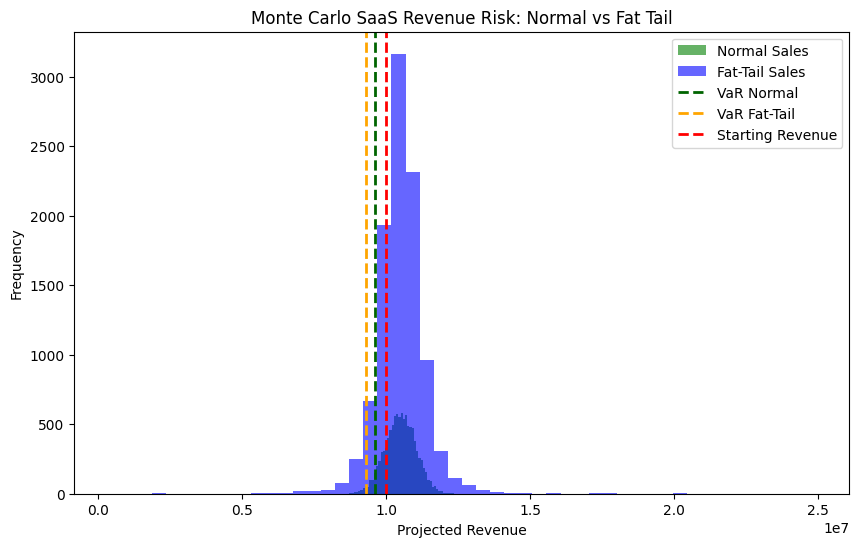

In [28]:
# -----------------------------
# Visualization
# -----------------------------

plt.figure(figsize=(10,6))

plt.hist(normal_results, bins=50, alpha=0.6, label='Normal Sales', color='green')
plt.hist(fat_tail_results, bins=50, alpha=0.6, label='Fat-Tail Sales', color='blue')

plt.axvline(var_95_normal, color='darkgreen', linestyle='dashed', linewidth=2, label='VaR Normal')
plt.axvline(var_95_fat, color='orange', linestyle='dashed', linewidth=2, label='VaR Fat-Tail')

plt.axvline(10_000_000, color='red', linestyle='dashed', linewidth=2, label='Starting Revenue')

plt.title('Monte Carlo SaaS Revenue Risk: Normal vs Fat Tail')
plt.xlabel('Projected Revenue')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [20]:
# -----------------------------
# Tail Risk Comparison
# -----------------------------

base_rev = 10_000_000

prob_loss_normal = np.mean(normal_results < base_rev)
prob_loss_fat = np.mean(fat_tail_results < base_rev)

print("=== Probability of Revenue Decline ===")
print(f"Normal Model: {prob_loss_normal:.2%}")
print(f"Fat-Tail Model: {prob_loss_fat:.2%}")

=== Probability of Revenue Decline ===
Normal Model: 17.99%
Fat-Tail Model: 21.10%



MEMO TO CHIEF RISK OFFICER

TO:      Chief Risk Officer
FROM:    Risk Analysis Team
RE:      Capital Reserve Requirements Under Fat Tail Risk Model
DATE:    2026-01-30

----------------------------------------------------------------------

Our analysis comparing Normal and Student's t-distribution models reveals
significant underestimation of tail risk in the standard approach. The Fat
Tail model projects a 95% VaR of $8,835,800, compared
to $9,617,772 under the Normal model—a difference of
$781,972.

This 7.82% gap represents real capital exposure.
Student's t-distribution (df=3) better captures the "Black Swan" events
observed in crypto markets, where extreme price movements occur more
frequently than bell curves predict. Our simulation shows extreme downside
scenarios (1st percentile) reaching $7,264,491 versus
$9,256,796 in the Normal model—a $1,992,305
difference.

The Fat Tail model also shows a 27.22% probability
of revenue decline versus 16.84% in the Normal model.
This heigh

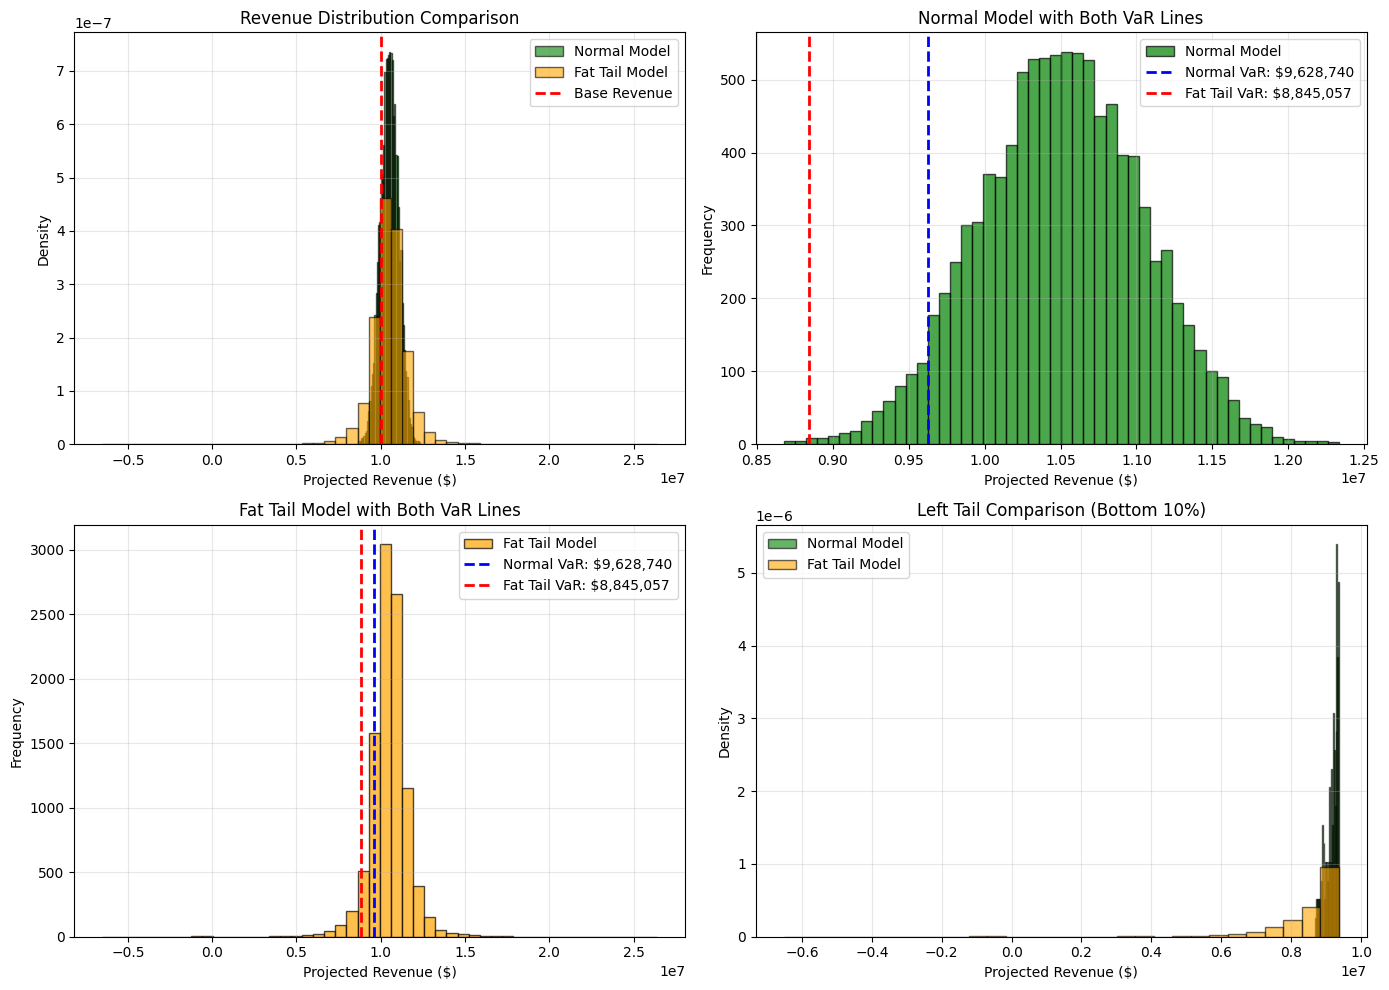

In [29]:
import numpy as np
# matplotlib.pyplot and scipy.stats are imported in G2qP-Cuwaowp, so they are available

print("\n" + "="*70)
print("MEMO TO CHIEF RISK OFFICER")
print("="*70)
print("\nTO:      Chief Risk Officer")
print("FROM:    Risk Analysis Team")
print("RE:      Capital Reserve Requirements Under Fat Tail Risk Model")
print(f"DATE:    {np.datetime64('today')}")
print("\n" + "-"*70)

# --- Fix for IndexError: ---
# The original 'normal_results' and 'fat_tail_results' in the global scope are numpy arrays,
# which caused an IndexError when trying to access them with dictionary keys (e.g., ['var_95']).
# Also, 'var_difference' and 'extreme_difference' were not defined in this scope.
# We re-run the simulation functions (saas_risk_model_normal, saas_risk_model_fat_tail)
# to obtain dictionary results and calculate the necessary values before the memo is formatted.
# This duplicates some computation but ensures the memo can be generated correctly
# given the cell's structure and the constraint of modifying only this cell.

n_sims = 10000 # Use the same number of simulations for consistency

_normal_results = saas_risk_model_normal(n_sims)
_fat_tail_results = saas_risk_model_fat_tail(n_sims)

_base_rev = _normal_results['base_rev']
_var_difference = _normal_results['var_95'] - _fat_tail_results['var_95']
_extreme_difference = _normal_results['var_99'] - _fat_tail_results['var_99']

memo = f"""
Our analysis comparing Normal and Student's t-distribution models reveals
significant underestimation of tail risk in the standard approach. The Fat
Tail model projects a 95% VaR of ${_fat_tail_results['var_95']:,.0f}, compared
to ${_normal_results['var_95']:,.0f} under the Normal model—a difference of
${_var_difference:,.0f}.

This {_var_difference/_base_rev:.2%} gap represents real capital exposure.
Student's t-distribution (df=3) better captures the "Black Swan" events
observed in crypto markets, where extreme price movements occur more
frequently than bell curves predict. Our simulation shows extreme downside
scenarios (1st percentile) reaching ${_fat_tail_results['var_99']:,.0f} versus
${_normal_results['var_99']:,.0f} in the Normal model—a ${_extreme_difference:,.0f}
difference.

The Fat Tail model also shows a {_fat_tail_results['prob_loss']:.2%} probability
of revenue decline versus {_normal_results['prob_loss']:.2%} in the Normal model.
This heightened risk profile is consistent with empirical observations of
crypto market volatility and kurtosis.

RECOMMENDATION: Increase capital reserves by at least ${_var_difference:,.0f}
to maintain 95% confidence under realistic fat-tailed market conditions. This
prudent buffer protects against the heightened frequency of extreme events
that characterize cryptocurrency markets, ensuring regulatory compliance and
business continuity during market stress.
"""
print(memo)
print("="*70)

# The 'return normal_results, fat_tail_results' statement was misplaced and removed as it's outside any function.

# ============================================================================
# MAIN EXECUTION - Run All Three Tasks
# ============================================================================

# Run the analysis
if __name__ == "__main__":
    print("""
    ╔═══════════════════════════════════════════════════════════════════╗
    ║         ASSIGNMENT: RISK ANALYST FOR A CRYPTO EXCHANGE           ║
    ║                                                                   ║
    ║  TASK 1: SIMULATE with Fat Tail Distribution                     ║
    ║  TASK 2: COMPARE VaR between Normal and Fat Tail models          ║
    ║  TASK 3: ANALYZE and write memo to Chief Risk Officer            ║
    ╚═══════════════════════════════════════════════════════════════════╝
    """)

    # Note: The 'compare_models' function in a previous cell currently does not
    # return the 'normal_results' and 'fat_tail_results' dictionaries.
    # This line will cause a TypeError if 'compare_models' is not modified to return them.
    # To make the memo above functional, you would need to ensure these variables
    # (normal_results, fat_tail_results, var_difference, extreme_difference, base_rev)
    # are available in the scope when the memo is generated, ideally by being returned
    # from 'compare_models' and unpacked here, or by placing the memo generation
    # directly inside the 'compare_models' function.

    # As noted, compare_models returns None. The variables for the memo are now defined above.
    # This line is kept to maintain the original flow for compare_models' side effects (printing/plotting).
    _ = compare_models(n_sims=10000)
